In [278]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [279]:
WIDTH = 600
HEIGHT = 450
THRESHOLD = 70

In [280]:
def detect_filled_dots(image_path, min_size=(15, 10), max_size=(25, 20)):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (WIDTH, HEIGHT))  # Resize images (example size, adjust as needed)
    # Thresholding to get a binary image
    _, binary = cv2.threshold(image, THRESHOLD, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filter contours based on size to identify filled dots
    # You may need to adjust the size threshold according to your specific images
    filled_dots = [cnt for cnt in contours if cv2.contourArea(cnt) > 5]

    # return filled_dots

    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for processing
    _, thresh = cv2.threshold(gray, THRESHOLD, 255, cv2.THRESH_BINARY_INV)

    # Define a kernel size for morphological operations
    kernel = np.ones((3, 3), np.uint8)

    # Erosion or Dilation
    erosion = cv2.erode(thresh, kernel, iterations=1)
    dilation = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours on the morphologically processed image
    contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filled_dots = [cnt for cnt in contours if cv2.contourArea(cnt) > 5 and cv2.contourArea(cnt) < 25]

    def filter_dots(dots):
        out = []

        for cnt in dots:
            x, y, w, h = cv2.boundingRect(cnt)
            print(x, y, w, h)

            if w >= min_size[0] and h >= min_size[1] and w <= max_size[0] and h <= max_size[1]:
                # Draw a small circle at the center of each contour (filled dot)
                # return cnt
                # M = cv2.moments(cnt)
                # # cv2.drawContours(image, [cnt], -1, (0, 255, 0), thickness=cv2.FILLED)
                # if M["m00"] != 0:
                #     cx = int(M["m10"] / M["m00"])
                #     cy = int(M["m01"] / M["m00"])
                #     # cv2.circle(image, (cx, cy), 5, (0, 0, 255), -1)
                #     cv2.drawContours(image, [cnt], -1, (0, 0, 255), thickness=cv2.FILLED)
                out.append(cnt)
            else:
                out.append(None)


    # print(filter_dots(filled_dots))

    # filled_dots = [cnt for cnt in filter_dots(filled_dots) if cnt != None]
    # print(filled_dots)

    return filled_dots


# Directory containing images
dir_path = "./images/augmented"
dots = []

# Process each image in the directory
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg'):  # Adjust the extension based on your image files
        image_path = os.path.join(dir_path, filename)
        dots = detect_filled_dots(image_path)
        print(f"Detected {len(dots)} filled dots in {filename}")

Detected 22 filled dots in duplicate_noballot_2_var2.jpg
Detected 30 filled dots in duplicate_noballot_3_var2.jpg
Detected 23 filled dots in duplicate_noballot_8_var1.jpg
Detected 27 filled dots in duplicate_noballot_8_var0.jpg
Detected 28 filled dots in duplicate_noballot_3_var3.jpg
Detected 36 filled dots in duplicate_noballot_2_var3.jpg
Detected 28 filled dots in duplicate_noballot_3_var1.jpg
Detected 31 filled dots in duplicate_noballot_2_var1.jpg
Detected 32 filled dots in duplicate_noballot_8_var2.jpg
Detected 23 filled dots in duplicate_noballot_8_var3.jpg
Detected 38 filled dots in duplicate_noballot_2_var0.jpg
Detected 24 filled dots in duplicate_noballot_3_var0.jpg
Detected 22 filled dots in duplicate_noballot_3_var4.jpg
Detected 17 filled dots in duplicate_noballot_2_var4.jpg
Detected 32 filled dots in duplicate_noballot_8_var4.jpg
Detected 36 filled dots in duplicate_noballot_4_var4.jpg
Detected 24 filled dots in duplicate_noballot_5_var4.jpg
Detected 52 filled dots in noba

In [281]:
def detect_circles(image):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.medianBlur(image, 5)
    circles = cv2.HoughCircles(image, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=0)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            center = (i[0], i[1])
            radius = i[2]
            # Draw the circle's center and circumference
            cv2.circle(image, center, radius, (0, 255, 0), 2)
            cv2.circle(image, center, 2, (0, 0, 255), 3)
    return image

def morphological_detection(image_path, min_size=(15, 10), max_size=(25, 20)):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale for processing
    _, thresh = cv2.threshold(gray, THRESHOLD, 255, cv2.THRESH_BINARY_INV)

    # Define a kernel size for morphological operations
    kernel = np.ones((3, 3), np.uint8)

    # Erosion or Dilation
    erosion = cv2.erode(thresh, kernel, iterations=1)
    dilation = cv2.dilate(thresh, kernel, iterations=1)

    # Find contours on the morphologically processed image
    contours, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    filled_dots = [cnt for cnt in contours if cv2.contourArea(cnt) > 5]
    features = []

    for cnt in filled_dots:
        x, y, w, h = cv2.boundingRect(cnt)

        if w >= min_size[0] and h >= min_size[1] and w <= max_size[0] and h <= max_size[1]:
            cv2.drawContours(image, [cnt], -1, (0, 0, 255), thickness=cv2.FILLED)
            area = cv2.contourArea(cnt)
            aspect_ratio = float(w) / h
            rect_area = w * h
            extent = float(area) / rect_area if rect_area > 0 else 0
            hu_moments = cv2.HuMoments(cv2.moments(cnt)).flatten()

            features.append((area, aspect_ratio, extent, hu_moments, image_path))

    return image, features

def draw_filled_dots(image_path, min_size=(12, 8)):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, THRESHOLD, 255, cv2.THRESH_BINARY_INV)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    filled_dots = [cnt for cnt in contours if cv2.contourArea(cnt) > 5]

    for cnt in filled_dots:
        x, y, w, h = cv2.boundingRect(cnt)
        # Draw a small circle at the center of each contour (filled dot)
        M = cv2.moments(cnt)
        if w >= min_size[0] and h >= min_size[1]:
            cv2.drawContours(image, [cnt], -1, (0, 255, 0), thickness=cv2.FILLED)
            if M["m00"] != 0:
                cx = int(M["m10"] / M["m00"])
                cy = int(M["m01"] / M["m00"])
                cv2.circle(image, (cx, cy), 5, (0, 255, 0), -1)

    return image


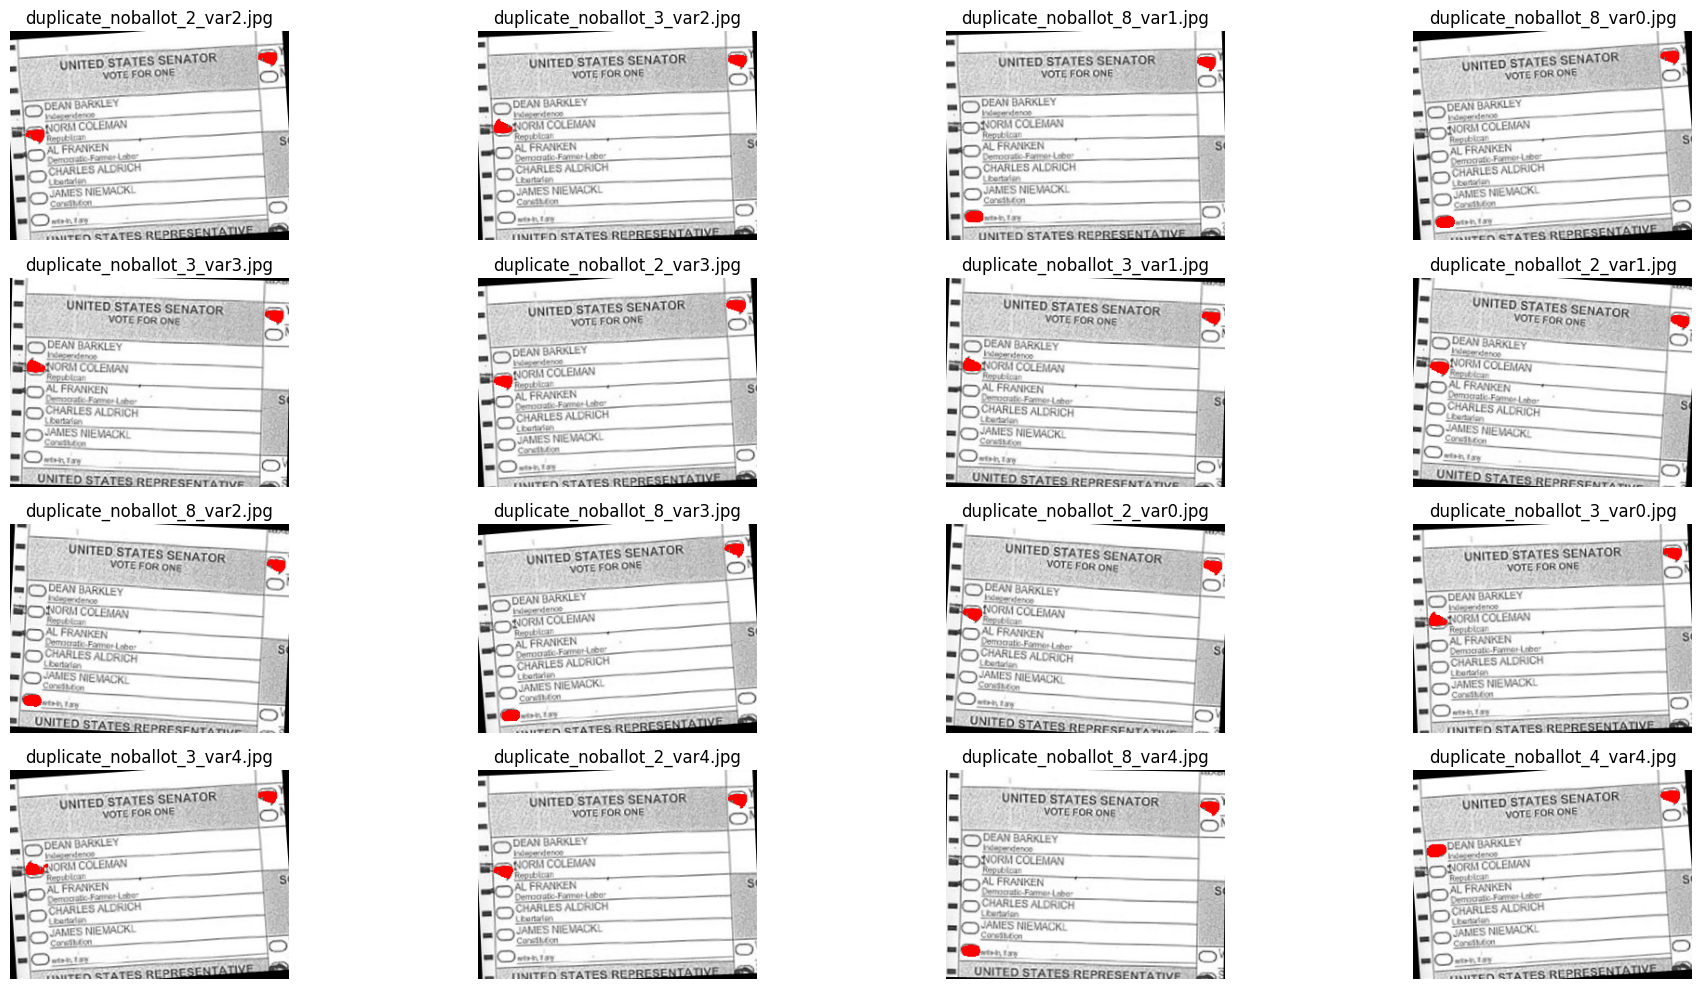

In [282]:
def display_images_grid(images, rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
    axes = axes.ravel()


    image_files = [file for file in os.listdir(dir_path) if file.endswith('.jpg')]  # Adjust the extension if needed

    for i in range(rows * cols):
        if i < len(images):
            axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
            axes[i].set_title(image_files[i])
            axes[i].axis('off')
        else:
            axes[i].axis('off')

    plt.tight_layout()
    plt.show()

# Process images and store them
processed_images = []
bubble_features = []

for filename in os.listdir(dir_path):
    if filename.endswith('.jpg'):
        image_path = os.path.join(dir_path, filename)
        processed_image, _bubble_features = morphological_detection(image_path)
        bubble_features.append(_bubble_features)
        processed_images.append(processed_image)

# Define the number of rows and columns for your image grid
num_rows = 4  # Adjust as needed
num_cols = 4  # Adjust as needed

# Display the images in a grid
display_images_grid(processed_images, num_rows, num_cols)

### Extract bubble features

In [283]:
print(bubble_features)
# Compare features as shown in the previous example


[[(169.0, 1.4285714285714286, 0.6035714285714285, array([1.98371095e-01, 7.59941392e-03, 1.92673140e-03, 2.70483066e-04,
       1.94688835e-07, 2.35637198e-05, 1.49675849e-08]), './images/augmented/duplicate_noballot_2_var2.jpg'), (175.5, 1.4285714285714286, 0.6267857142857143, array([1.94572268e-01, 7.70715344e-03, 1.54554768e-03, 1.71290059e-04,
       8.65099448e-08, 1.48292918e-05, 1.68370700e-08]), './images/augmented/duplicate_noballot_2_var2.jpg')], [(180.0, 1.3333333333333333, 0.6, array([1.90975533e-01, 6.18111796e-03, 1.57928193e-03, 1.15326625e-04,
       4.42621973e-08, 8.24866257e-06, 2.15237574e-08]), './images/augmented/duplicate_noballot_3_var2.jpg'), (176.0, 1.5384615384615385, 0.676923076923077, array([ 1.90117654e-01,  8.82537100e-03,  5.24732390e-04,  3.26721329e-05,
        3.89289814e-09,  2.64923836e-06, -1.77374042e-09]), './images/augmented/duplicate_noballot_3_var2.jpg')], [(183.5, 1.5833333333333333, 0.8048245614035088, array([1.81116891e-01, 6.69678349e-03, 

### Compare dots

In [284]:
def extract_contour_features(image_path):
    image = cv2.imread(image_path, 0)
    _, thresh = cv2.threshold(image, 110, 255, cv2.THRESH_BINARY_INV)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    features = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = float(w) / h
        rect_area = w * h
        extent = float(area) / rect_area if rect_area > 0 else 0
        hu_moments = cv2.HuMoments(cv2.moments(cnt)).flatten()

        features.append((area, aspect_ratio, extent, hu_moments))

    return features

def are_features_identical(features1, features2):
    if len(features1) != len(features2):
        return False

    for f1, f2 in zip(features1, features2):
        area1, aspect_ratio1, extent1, hu_moments1 = f1
        area2, aspect_ratio2, extent2, hu_moments2 = f2

        if not (area1 == area2 and aspect_ratio1 == aspect_ratio2 and extent1 == extent2 and np.allclose(hu_moments1, hu_moments2)):
            return False

    return True

ballot_features = {}  # Dictionary to hold features of each ballot

# Extract features for each ballot and store in the dictionary
for filename in os.listdir(dir_path):
    if filename.endswith('.jpg'):  # Adjust the extension as needed
        image_path = os.path.join(dir_path, filename)
        features = extract_contour_features(image_path)
        ballot_features[filename] = features

# Compare features to find exact matches
for ballot1, features1 in ballot_features.items():
    for ballot2, features2 in ballot_features.items():
        if ballot1 != ballot2 and are_features_identical(features1, features2):
            print(f"Exact match found between {ballot1} and {ballot2}")

# print(ballot_features)

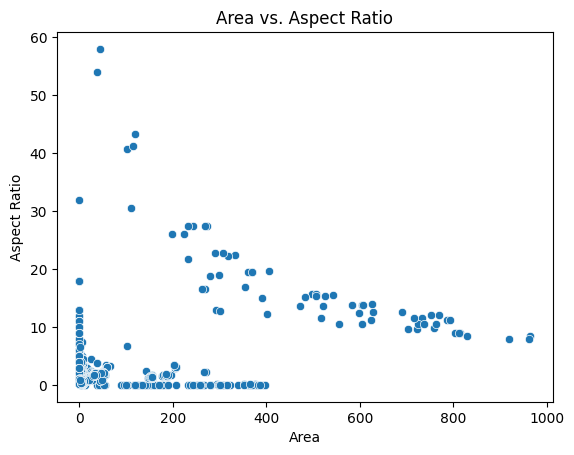

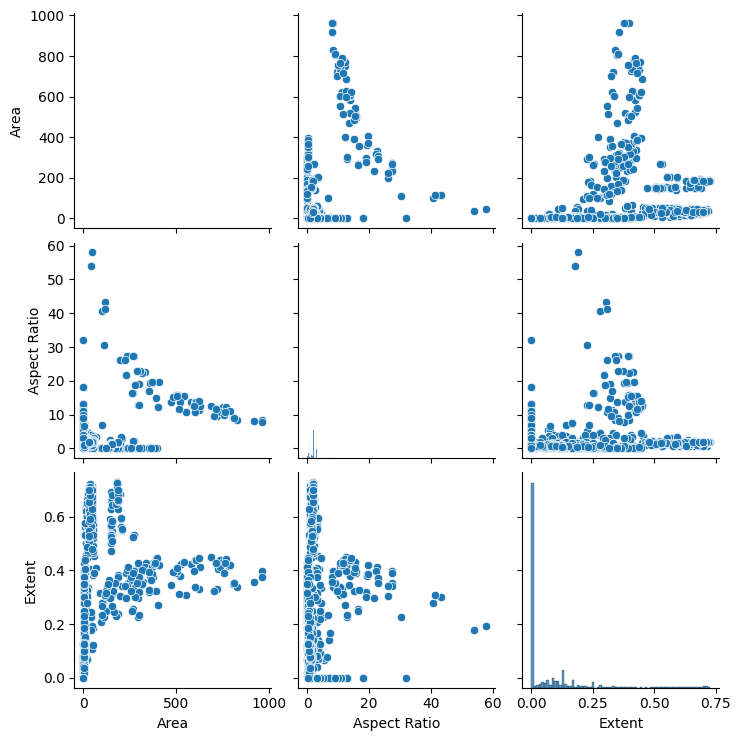

In [285]:
# Example: Converting your extracted features into a pandas DataFrame
# Let's assume 'ballot_features' is your dictionary with filenames as keys and lists of feature tuples as values

# Flattening the feature tuples into a list for each feature type
areas = []
aspect_ratios = []
extents = []
# Add more lists for other features as necessary

for features in ballot_features.values():
    for feature in features:
        areas.append(feature[0])
        aspect_ratios.append(feature[1])
        extents.append(feature[2])
        # Continue for other features

# Creating a DataFrame
df = pd.DataFrame({
    'Area': areas,
    'Aspect Ratio': aspect_ratios,
    'Extent': extents
    # Add other features here
})

df.head()  # Display the first few rows of the DataFrame

sns.scatterplot(data=df, x='Area', y='Aspect Ratio')
plt.title('Area vs. Aspect Ratio')
plt.show()

sns.pairplot(df)
plt.show()
